In [167]:
import pickle
import pandas as pd
from sklearn import tree

data = pd.read_csv("data-turbine/clear-data.csv")
model = pickle.load(open("data-turbine/tree-gs.model.sav", "rb"))
features = (
    data
    .drop(["CO"], axis=1)
    .columns.values.tolist()
)

rules = tree.export_text(model, feature_names=features)
print(rules)

|--- TIT <= 1058.15
|   |--- TAT <= 543.87
|   |   |--- TAT <= 528.12
|   |   |   |--- value: [22.39]
|   |   |--- TAT >  528.12
|   |   |   |--- value: [10.12]
|   |--- TAT >  543.87
|   |   |--- TAT <= 549.23
|   |   |   |--- value: [6.44]
|   |   |--- TAT >  549.23
|   |   |   |--- value: [4.53]
|--- TIT >  1058.15
|   |--- TIT <= 1076.55
|   |   |--- TAT <= 545.34
|   |   |   |--- value: [6.61]
|   |   |--- TAT >  545.34
|   |   |   |--- value: [2.96]
|   |--- TIT >  1076.55
|   |   |--- TIT <= 1091.35
|   |   |   |--- value: [1.71]
|   |   |--- TIT >  1091.35
|   |   |   |--- value: [1.28]



In [ ]:
from src.rules import get_rules


rules = get_rules(model, features)
display(len(rules))
rules

8

[if (TIT > 1058.15) and (TIT > 1076.55) and (TIT > 1091.35) -> 1.283,
 if (TIT > 1058.15) and (TIT > 1076.55) and (TIT <= 1091.35) -> 1.708,
 if (TIT <= 1058.15) and (TAT > 543.87) and (TAT <= 549.235) -> 6.441,
 if (TIT <= 1058.15) and (TAT > 543.87) and (TAT > 549.235) -> 4.533,
 if (TIT > 1058.15) and (TIT <= 1076.55) and (TAT <= 545.34) -> 6.609,
 if (TIT > 1058.15) and (TIT <= 1076.55) and (TAT > 545.34) -> 2.956,
 if (TIT <= 1058.15) and (TAT <= 543.87) and (TAT > 528.115) -> 10.121,
 if (TIT <= 1058.15) and (TAT <= 543.87) and (TAT <= 528.115) -> 22.394]

In [169]:
from src.rules import normalise_rules


rules = normalise_rules(rules)
display(len(rules))
rules

8

[if (TIT > 1058.15) -> 1.283,
 if (TIT > 1058.15) and (TIT <= 1091.35) -> 1.708,
 if (TIT <= 1058.15) and (TAT > 543.87) and (TAT <= 549.235) -> 6.441,
 if (TIT <= 1058.15) and (TAT > 543.87) -> 4.533,
 if (TIT > 1058.15) and (TIT <= 1076.55) and (TAT <= 545.34) -> 6.609,
 if (TIT > 1058.15) and (TIT <= 1076.55) and (TAT > 545.34) -> 2.956,
 if (TIT <= 1058.15) and (TAT <= 543.87) and (TAT > 528.115) -> 10.121,
 if (TIT <= 1058.15) and (TAT <= 543.87) -> 22.394]

In [170]:
from src.rules import delete_same_rules


rules = delete_same_rules(rules)
display(len(rules))
rules

8

[if (TIT > 1058.15) -> 1.283,
 if (TIT > 1058.15) and (TIT <= 1091.35) -> 1.708,
 if (TIT <= 1058.15) and (TAT > 543.87) and (TAT <= 549.235) -> 6.441,
 if (TIT <= 1058.15) and (TAT > 543.87) -> 4.533,
 if (TIT > 1058.15) and (TIT <= 1076.55) and (TAT <= 545.34) -> 6.609,
 if (TIT > 1058.15) and (TIT <= 1076.55) and (TAT > 545.34) -> 2.956,
 if (TIT <= 1058.15) and (TAT <= 543.87) and (TAT > 528.115) -> 10.121,
 if (TIT <= 1058.15) and (TAT <= 543.87) -> 22.394]

In [171]:
from sklearn.model_selection import train_test_split

random_state = 9

y = data["CO"]
X = data.drop(["CO"], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)
display(X_train, y_train, X_test, y_test)

AH     TIT     TAT
4480   83.256  1100.0  540.65
24883  73.583  1099.8  538.53
21557  81.089  1100.0  534.04
1705   64.757  1086.6  549.76
21388  75.645  1100.0  534.21
...       ...     ...     ...
25725  85.663  1072.2  549.82
5014   75.280  1058.0  549.86
22584  92.874  1067.2  550.15
501    93.029  1099.9  524.78
20828  88.840  1079.9  550.02

[29386 rows x 3 columns]

4480     0.3527
24883    1.2522
21557    1.4718
1705     1.3117
21388    1.7835
          ...  
25725    2.4980
5014     3.2652
22584    1.2630
501      0.7851
20828    2.7272
Name: CO, Length: 29386, dtype: float64

AH     TIT     TAT
18246  84.837  1088.7  550.39
20343  59.574  1100.0  542.01
2924   81.262  1092.9  544.91
117    88.135  1100.0  526.21
5713   86.846  1080.2  550.25
...       ...     ...     ...
21917  75.935  1081.1  549.66
13099  78.314  1089.8  550.37
26704  79.478  1073.0  550.19
4182   41.623  1100.2  539.10
2982   69.233  1091.6  549.98

[7347 rows x 3 columns]

18246    1.34970
20343    1.63430
2924     0.78632
117      0.72742
5713     1.35980
          ...   
21917    1.45140
13099    1.00960
26704    2.01190
4182     0.37685
2982     1.15990
Name: CO, Length: 7347, dtype: float64

In [172]:
from src.rules import simplify_rules

rules = simplify_rules(X_train, rules)
rules

[if (TIT = 1100.9) -> 1.283,
 if (TIT = 1074.75) -> 1.708,
 if (TIT = 1001.3) and (TAT = 546.552) -> 6.441,
 if (TIT = 1001.3) and (TAT = 550.6) -> 4.533,
 if (TIT = 1067.35) and (TAT = 511.04) -> 6.609,
 if (TIT = 1067.35) and (TAT = 550.6) -> 2.956,
 if (TIT = 1001.3) and (TAT = 535.993) -> 10.121,
 if (TIT = 1001.3) and (TAT = 511.04) -> 22.394]

In [173]:
data.describe().transpose()

count         mean        std          min        25%        50%  \
AH   36733.0    77.867015  14.461355    24.085000    68.1880    80.4700   
TIT  36733.0  1081.428084  17.536373  1000.800000  1071.8000  1085.9000   
TAT  36733.0   546.158517   6.842360   511.040000   544.7200   549.8800   
CO   36733.0     2.372468   2.262672     0.000388     1.1824     1.7135   

           75%       max  
AH     89.3760   100.200  
TIT  1097.0000  1100.900  
TAT   550.0400   550.610  
CO      2.8429    44.103

/Users/user/Projects/python/fuzzy-rules-generator/.venv/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


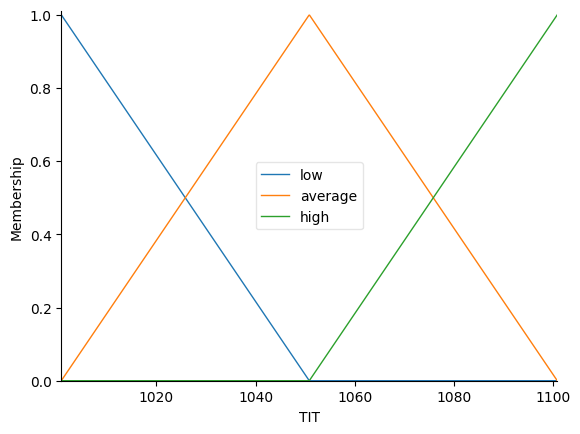

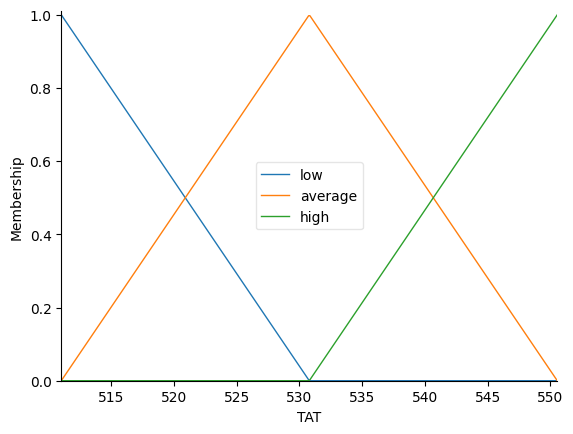

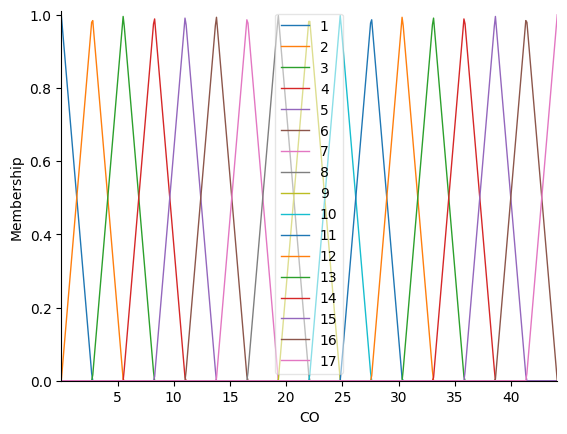

In [198]:
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz

# AT = ctrl.Antecedent(np.arange(-6.2348, 37.103, 0.0001), "AT")
# AP = ctrl.Antecedent(np.arange(985.85, 1036.6, 0.01), "AP")
# AH = ctrl.Antecedent(np.arange(24.085, 100.2, 0.1), "AH")
# AFDP = ctrl.Antecedent(np.arange(2.0874, 7.6106, 0.0001), "AFDP")
TIT = ctrl.Antecedent(np.arange(1000.8, 1100.9, 0.1), "TIT")
TAT = ctrl.Antecedent(np.arange(511.04, 550.61, 0.1), "TAT")
CO = ctrl.Consequent(np.arange(0.000388, 44.103, 0.1), "CO")

# AT.automf(3, variable_type="quant")
# AP.automf(5, variable_type="quant")
# AH.automf(5, variable_type="quant")
# AH.view()
# AFDP.automf(3, variable_type="quant")
TIT.automf(3, variable_type="quant")
# TIT["low"] = fuzz.zmf(TIT.universe, 1025, 1035)
# TIT["average"] = fuzz.trapmf(TIT.universe, [1025, 1035, 1056, 1075])
# TIT["high"] = fuzz.smf(TIT.universe, 1065, 1075)
TIT.view()
TAT.automf(3, variable_type="quant")
# TAT["low"] = fuzz.zmf(TAT.universe, 520, 525)
# TAT["average"] = fuzz.trapmf(TAT.universe, [520, 525, 535, 540])
# TAT["high"] = fuzz.smf(TAT.universe, 535, 540)
TAT.view()
CO.automf(names=[str(i) for i in range(1, 18)], variable_type="quant")
# CO["low"] = fuzz.zmf(CO.universe, 10, 13)
# CO["average"] = fuzz.trapmf(CO.universe, [10, 13, 30, 33])
# CO["high"] = fuzz.smf(CO.universe, 30, 33)
CO.view()

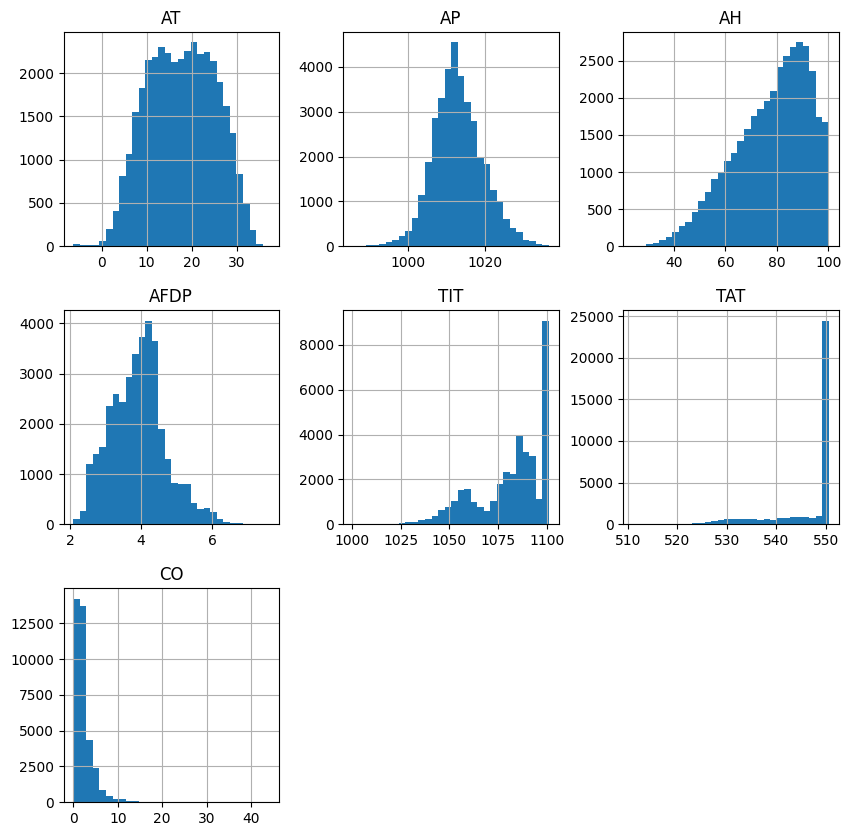

In [ ]:
import matplotlib.pyplot as plt

data.hist(bins=30, figsize=(10, 10))
plt.show()

In [199]:
from src.rules import get_fuzzy_rules

fuzzy_variables = {
    # "AT": AT,
    # "AP": AP,
    # "AH": AH,
    # "AFDP": AFDP,
    "TIT": TIT,
    "TAT": TAT,
    "consequent": CO,
}
fuzzy_rules = get_fuzzy_rules(rules, fuzzy_variables)

fuzzy_cntrl = ctrl.ControlSystem(fuzzy_rules)

sim = ctrl.ControlSystemSimulation(fuzzy_cntrl, lenient=False)

display(len(fuzzy_rules))
fuzzy_rules

7

[IF TIT[high] THEN CO[1]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF TIT[average] THEN CO[2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF TIT[low] AND TAT[high] THEN CO[3]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF TIT[average] AND TAT[low] THEN CO[3]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF TIT[average] AND TAT[high] THEN CO[2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF TIT[low] AND TAT[average] THEN CO[5]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF TIT[low] AND TAT[low] THEN CO[9]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax]

 Antecedents 
Antecedent: TIT                     = 1032.5
  - low                             : 0.36663336663350904
  - average                         : 0.6333666333664919
  - high                            : 0.0
Antecedent: TAT                     = 524.71
  - low                             : 0.3078481012659794
  - average                         : 0.6921518987340216
  - high                            : 0.0

 Rules 
RULE #0:
  IF TIT[high] THEN CO[1]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - TIT[high]                                              : 0.0
                                                 TIT[high] = 0.0
  Activation (THEN-clause):
                                                     CO[1] : 0.0

RULE #1:
  IF TIT[average] THEN CO[2]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - TIT[average]                                           : 0.6333666333664919
         

np.float64(9.796844832357262)

/Users/user/Projects/python/fuzzy-rules-generator/.venv/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


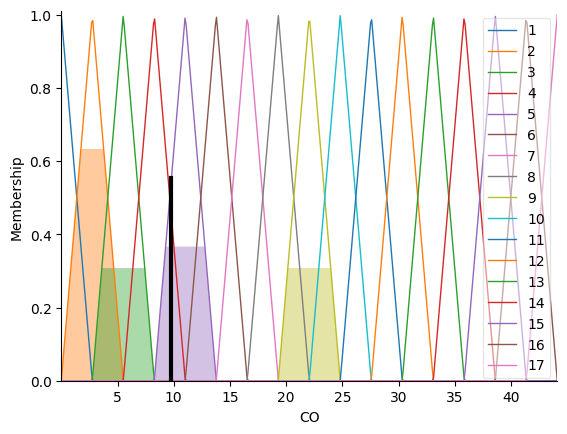

In [208]:
# sim.input["AT"] = 4.5878
# sim.input["AP"] = 1018.7
# sim.input["AH"] = 83.675
# sim.input["AFDP"] = 3.5758
# sim.input["TIT"] = 1086.2
# sim.input["TAT"] = 549.83
# sim.input["AT"] = 7.8167
# sim.input["AP"] = 1022.2
# sim.input["AH"] = 88.135
# sim.input["AFDP"] = 4.6605
# sim.input["TIT"] = 1100.0
# sim.input["TAT"] = 526.21
sim.input["TIT"] = 1032.5
sim.input["TAT"] = 524.71
sim.compute()
sim.print_state()
display(sim.output["CO"])
CO.view(sim=sim)

In [201]:
from sklearn import metrics
import math


def fuzzy_pred(row):
    # sim.input["AT"] = row["AT"]
    # sim.input["AP"] = row["AP"]
    # sim.input["AH"] = row["AH"]
    # sim.input["AFDP"] = row["AFDP"]
    sim.input["TIT"] = row["TIT"]
    sim.input["TAT"] = row["TAT"]
    sim.compute()
    return sim.output["CO"]


def rmse(row):
    return math.sqrt(metrics.mean_squared_error([row["Real"]], [row["Inferred"]]))

result_train = X_train.copy()
result_train["Real"] = y_train
result_train = result_train[:10000]

result_train["Inferred"] = result_train.apply(fuzzy_pred, axis=1)
result_train["RMSE"] = result_train.apply(rmse, axis=1)
result_train = result_train.round({"RMSE": 3})
result_train.head(15)

AH     TIT     TAT    Real  Inferred   RMSE
4480   83.256  1100.0  540.65  0.3527  1.030988  0.678
24883  73.583  1099.8  538.53  1.2522  1.054438  0.198
21557  81.089  1100.0  534.04  1.4718  1.030988  0.441
1705   64.757  1086.6  549.76  1.3117  2.037783  0.726
21388  75.645  1100.0  534.21  1.7835  1.030988  0.753
36422  69.953  1076.7  549.96  2.9304  2.405596  0.525
21816  70.858  1087.8  549.43  1.7219  1.978597  0.257
34158  47.855  1085.2  549.91  1.5878  2.102088  0.514
12784  69.850  1090.5  550.26  2.0753  1.829492  0.246
30182  70.275  1060.9  550.13  4.1917  2.703573  1.488
3996   61.376  1092.2  549.89  0.3633  1.722400  1.359
31492  63.967  1085.9  549.98  2.0315  2.070541  0.039
36021  61.707  1081.1  549.34  2.3146  2.264986  0.050
21791  96.150  1087.7  549.79  1.2175  1.983683  0.766
1054   80.911  1086.1  550.32  1.1838  2.061306  0.878

In [202]:
result_test = X_test.copy()
result_test["Real"] = y_test

result_test["Inferred"] = result_test.apply(fuzzy_pred, axis=1)
result_test["RMSE"] = result_test.apply(rmse, axis=1)
result_test = result_test.round({"RMSE": 3})
result_test

AH     TIT     TAT     Real  Inferred   RMSE
18246  84.837  1088.7  550.39  1.34970  1.931475  0.582
20343  59.574  1100.0  542.01  1.63430  1.030988  0.603
2924   81.262  1092.9  544.91  0.78632  1.674815  0.888
117    88.135  1100.0  526.21  0.72742  1.227915  0.500
5713   86.846  1080.2  550.25  1.35980  2.296405  0.937
...       ...     ...     ...      ...       ...    ...
21917  75.935  1081.1  549.66  1.45140  2.264986  0.814
13099  78.314  1089.8  550.37  1.00960  1.870484  0.861
26704  79.478  1073.0  550.19  2.01190  2.501657  0.490
4182   41.623  1100.2  539.10  0.37685  1.007260  0.630
2982   69.233  1091.6  549.98  1.15990  1.761544  0.602

[7347 rows x 6 columns]

In [209]:
result_test.sort_values(by="Real", ascending=False).head(30)

AH     TIT     TAT    Real   Inferred    RMSE
7673   87.114  1032.5  524.71  43.397   9.796845  33.600
23461  86.171  1011.7  523.67  34.267  12.157933  22.109
7566   96.843  1048.1  532.44  31.538   3.713874  27.824
6451   75.234  1086.5  549.41  30.866   2.042539  28.823
30712  41.576  1085.4  549.99  26.286   2.093210  24.193
23299  86.811  1020.8  527.23  25.431   9.787437  15.644
24429  90.582  1032.7  527.79  25.248   8.521376  16.727
30711  42.412  1085.4  549.83  24.239   2.093210  22.146
28102  82.969  1021.3  528.98  22.648   8.826828  13.821
13945  97.060  1036.7  531.58  22.364   5.647694  16.716
28103  82.795  1023.8  530.13  21.538   7.724971  13.813
13606  93.559  1059.2  538.95  19.798   2.719744  17.078
7475   90.801  1062.8  538.95  17.437   2.682083  14.755
21909  94.108  1024.9  530.78  16.883   7.024421   9.859
23319  99.787  1036.5  540.31  16.707   5.784987  10.922
14132  86.278  1056.5  539.51  16.487   2.739673  13.747
31058  76.429  1020.6  534.28  15.436   7.386979   8.049
35692  77.444  1024.2  537.25  14.354   6.957822   7.396
35767  82.608  1023.9  537.28  14.335   6.984216   7.351
16283  97.666  1037.7  536.87  14.330   5.645364   8.685
35538  57.388  1025.0  537.06  14.319   6.889985   7.429
29463  62.448  1023.4  532.80  14.022   7.133375   6.889
16142  86.553  1031.2  531.64  13.972   6.305942   7.666
36332  85.795  1028.2  533.72  13.921   6.634563   7.286
31061  74.602  1024.8  537.19  13.808   6.904978   6.903
29491  57.403  1024.9  527.72  13.798   9.191775   4.606
16308  94.312  1038.0  537.41  13.694   5.608827   8.085
17015  91.229  1037.3  536.74  13.535   5.693009   7.842
16440  90.749  1038.9  538.70  13.427   5.494759   7.932
6200   74.598  1026.4  531.47  13.401   6.828658   6.572

In [203]:
rmetrics = {}
rmetrics["RMSE_train"] = math.sqrt(
    metrics.mean_squared_error(result_train["Real"], result_train["Inferred"])
)
rmetrics["RMSE_test"] = math.sqrt(
    metrics.mean_squared_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["RMAE_train"] = math.sqrt(
    metrics.mean_absolute_error(result_train["Real"], result_train["Inferred"])
)
rmetrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["MAE_train"] = float(
    metrics.mean_absolute_error(result_train["Real"], result_train["Inferred"])
)
rmetrics["MAE_test"] = float(
    metrics.mean_absolute_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["R2_train"] = metrics.r2_score(result_train["Real"], result_train["Inferred"])
rmetrics["R2_test"] = metrics.r2_score(result_test["Real"], result_test["Inferred"])

rmetrics

{'RMSE_train': 1.7299137907376438,
 'RMSE_test': 1.698938435821616,
 'RMAE_train': 0.9848798137462832,
 'RMAE_test': 0.9911061203140067,
 'MAE_train': 0.9699882475249134,
 'MAE_test': 0.9822913417238822,
 'R2_train': 0.4294619850284326,
 'R2_test': 0.4301952907925036}